Problem Statement:

Context:

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset. 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDClassifier   
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("happinessscoredata.csv")

In [3]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.sample(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
33,Thailand,Southeastern Asia,34,6.455,0.03557,0.96690,1.26504,0.73850,0.55664,0.03187,0.57630,2.31945
18,Belgium,Western Europe,19,6.937,0.03595,1.30782,1.28566,0.89667,0.58450,0.22540,0.22250,2.41484
12,Austria,Western Europe,13,7.200,0.03751,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088,2.53320
86,Serbia,Central and Eastern Europe,87,5.123,0.04864,0.92053,1.00964,0.74836,0.20107,0.02617,0.19231,2.02500
80,Pakistan,Southern Asia,81,5.194,0.03726,0.59543,0.41411,0.51466,0.12102,0.10464,0.33671,3.10709


In [6]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

# Checking the null values in dataset. 

In [7]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Note: There is no null values or missing present in the dataset. 

# EDA Process 

In [8]:
#Checking the data with scatterplot - we can look how closely are data is equally distributed. 

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Dystopia Residual'>

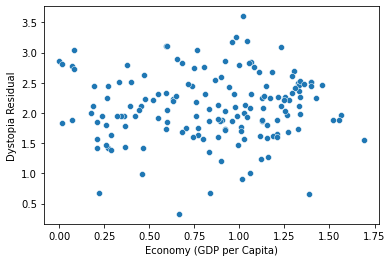

In [9]:
sns.scatterplot(x="Economy (GDP per Capita)", y = "Dystopia Residual", data = df)

The data is equally distributed in the range 0.25 and 1.25. There are some outliers persent in the data as well but it is quite less. 

<AxesSubplot:xlabel='Family', ylabel='Dystopia Residual'>

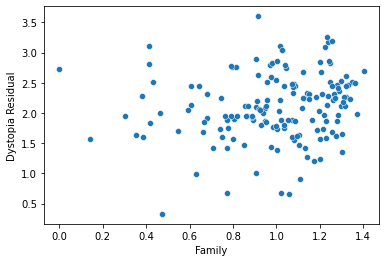

In [10]:
sns.scatterplot(x = "Family", y = "Dystopia Residual", data = df)

The data is distrubuted in the range 0.6 and 1.2. However, there are some outliers present in the dataset as well. However it is little left skewed. 

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Dystopia Residual'>

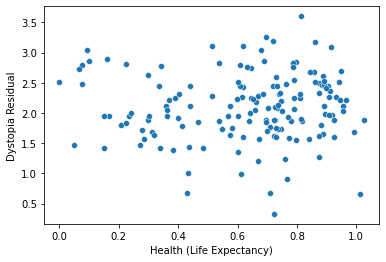

In [11]:
sns.scatterplot(x = "Health (Life Expectancy)", y = "Dystopia Residual", data = df)

The data is normally distributed between health (life expectancy) and dystopia resdiual between the range of 0.2 and 0.8. 

<AxesSubplot:xlabel='Freedom', ylabel='Dystopia Residual'>

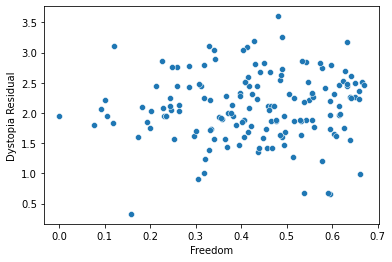

In [12]:
sns.scatterplot(x = "Freedom", y = "Dystopia Residual", data = df)

The data is distributed between the range of 0.2 and 0.7 but it is little left skewed data. 

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Dystopia Residual'>

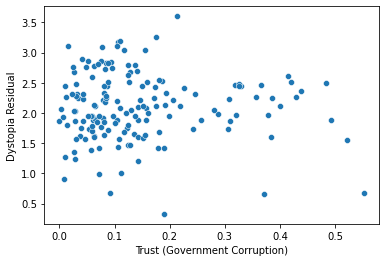

In [13]:
sns.scatterplot(x = "Trust (Government Corruption)", y = "Dystopia Residual", data = df)

The data is equally distributed between 0.0 and 0.2 but the data is right skewed. 

<AxesSubplot:xlabel='Generosity', ylabel='Dystopia Residual'>

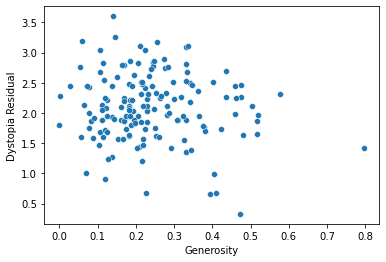

In [14]:
sns.scatterplot(x = "Generosity", y = "Dystopia Residual", data = df)

The data is equally distributed between Generosity andd Dystopia Residual from 0.1 and 0.3. There are outliers present too. 

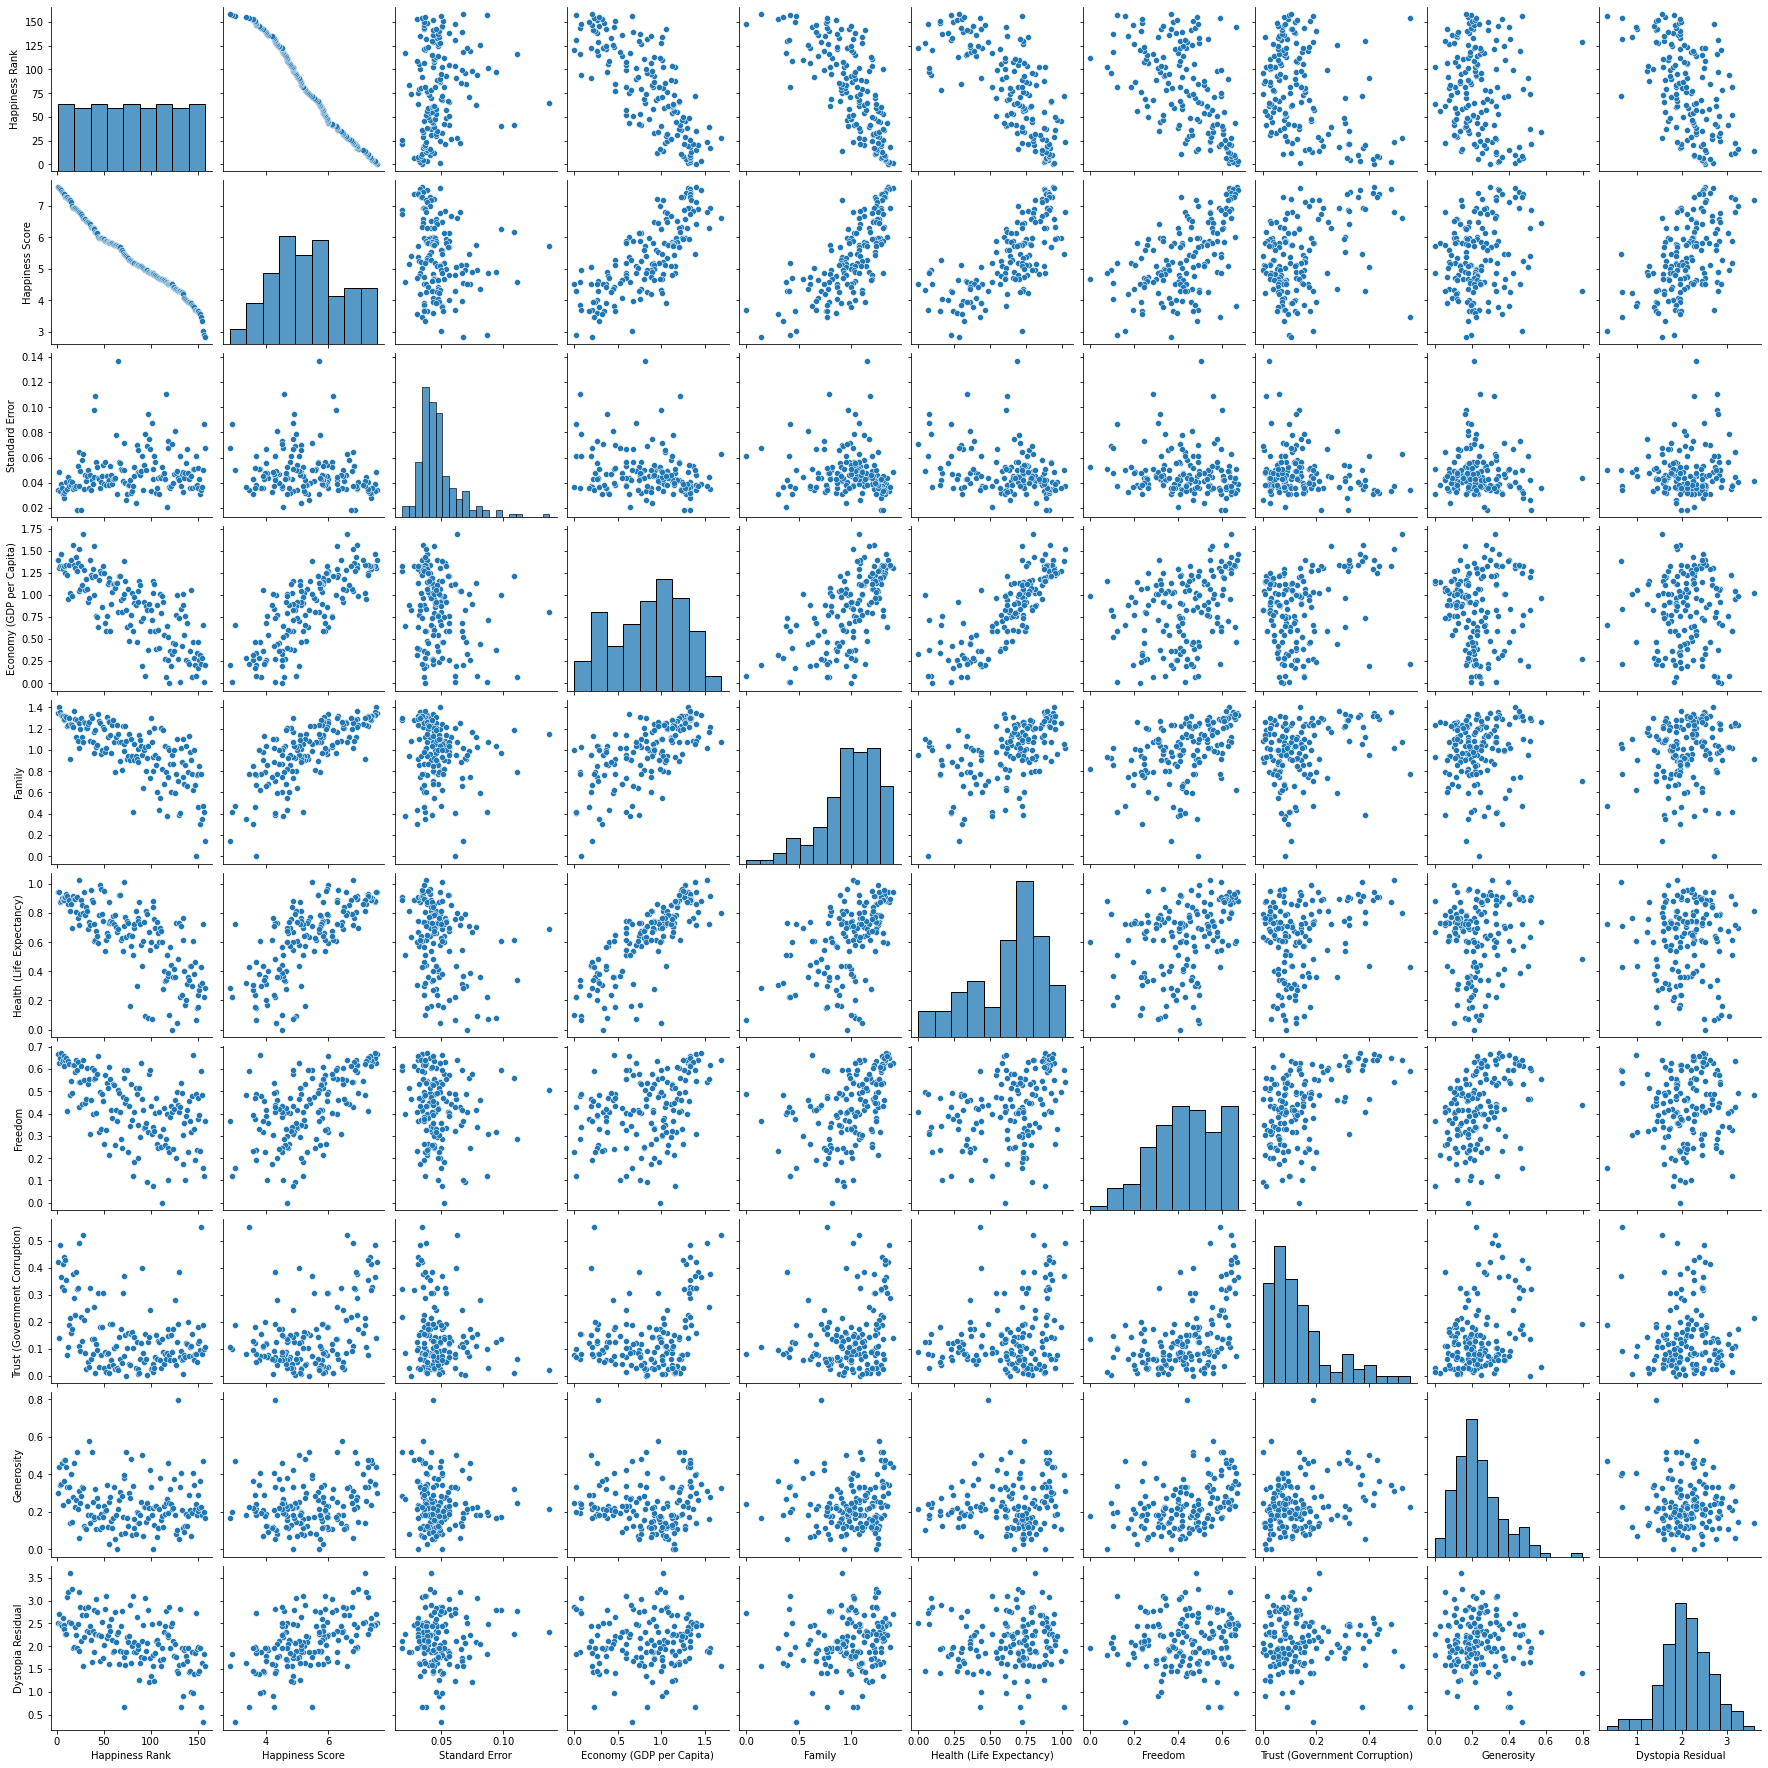

In [15]:
sns.pairplot(df)
plt.savefig('pairplot.png')
plt.show()

Observation: We got the all the scatter plot and histograms at once with pairplot. Here all the independent variables are comparable with the dependent variable, that is, Dystopia Residual. It shows how our data is distrubute with respect to the each respective independent and dependent varaibles. For knowing the distribution, here we get the histogram that is actaully showing data is quite skewed which further needs to be corrected. 

In [16]:
#Correlation: 

In [17]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


In [18]:
df.corr()['Dystopia Residual'].sort_values(ascending = True)

Happiness Rank                  -0.521999
Generosity                      -0.101301
Trust (Government Corruption)   -0.033105
Health (Life Expectancy)         0.018979
Economy (GDP per Capita)         0.040059
Freedom                          0.062783
Standard Error                   0.083981
Family                           0.148117
Happiness Score                  0.530474
Dystopia Residual                1.000000
Name: Dystopia Residual, dtype: float64

<AxesSubplot:>

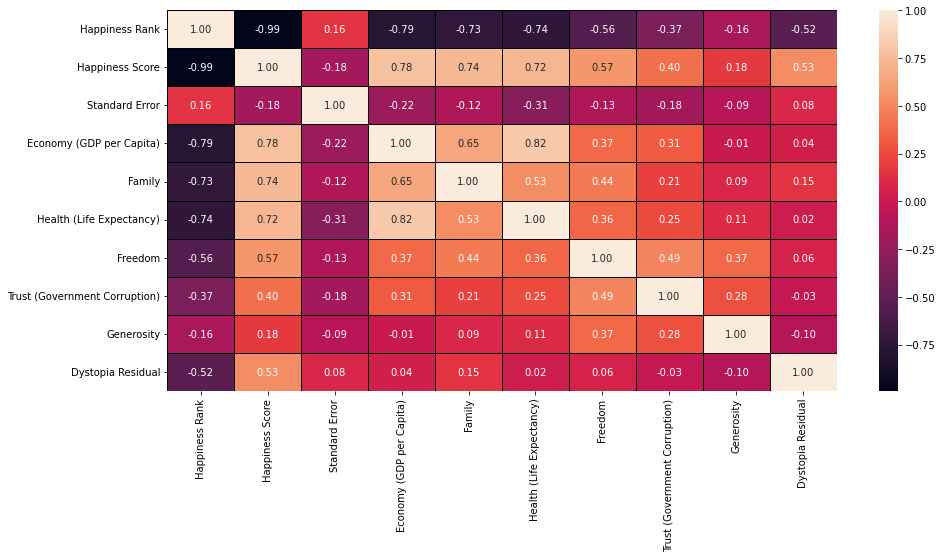

In [19]:
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(), annot = True, linewidths = 0.5, linecolor = "black", fmt = '.2f')

Observation: 

    1. Happiness rank is 52% negatively correlated with Dystopia Residual. It implies if there is a change of 1% in happiness rank then it will negatively effect the Dystopia Residual. Both will go in different directions. 
    2. Generosity is 10% negatively correlated with Dystopia Residual. 
    3. Trust is 3% negatively correlated with Dystopia Residual. 
    4. Health is 1% correlated with Dystopia Residual. 
    5. GDP per capita is 4% correlated with Dystopia Residual. 
    6. Freedom is 6% coorelated with Dystopia Residual. 
    7. Family is 14% correlated with Dystopia Residual. 
    
To Note: Happiness score and happiness ranks are highly correlated and Health life expeactancy and GDP per capita is highly correlated. 

In [20]:
#Descriptive Statistics: 

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,158.0,79.493671,45.754363,1.00000,40.250000,79.500000,118.750000,158.00000
Happiness Score,158.0,5.375734,1.145010,2.83900,4.526000,5.232500,6.243750,7.58700
Standard Error,158.0,0.047885,0.017146,0.01848,0.037268,0.043940,0.052300,0.13693
Economy (GDP per Capita),158.0,0.846137,0.403121,0.00000,0.545808,0.910245,1.158448,1.69042
Family,158.0,0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223
Health (Life Expectancy),158.0,0.630259,0.247078,0.00000,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,0.428615,0.150693,0.00000,0.328330,0.435515,0.549092,0.66973
Trust (Government Corruption),158.0,0.143422,0.120034,0.00000,0.061675,0.107220,0.180255,0.55191
Generosity,158.0,0.237296,0.126685,0.00000,0.150553,0.216130,0.309883,0.79588
Dystopia Residual,158.0,2.098977,0.553550,0.32858,1.759410,2.095415,2.462415,3.60214


In [22]:
round(df.describe()[1:].transpose(),2)

,mean,std,min,25%,50%,75%,max
Happiness Rank,79.49,45.75,1.00,40.25,79.50,118.75,158.00
Happiness Score,5.38,1.15,2.84,4.53,5.23,6.24,7.59
Standard Error,0.05,0.02,0.02,0.04,0.04,0.05,0.14
Economy (GDP per Capita),0.85,0.40,0.00,0.55,0.91,1.16,1.69
Family,0.99,0.27,0.00,0.86,1.03,1.21,1.40
Health (Life Expectancy),0.63,0.25,0.00,0.44,0.70,0.81,1.03
Freedom,0.43,0.15,0.00,0.33,0.44,0.55,0.67
Trust (Government Corruption),0.14,0.12,0.00,0.06,0.11,0.18,0.55
Generosity,0.24,0.13,0.00,0.15,0.22,0.31,0.80
Dystopia Residual,2.10,0.55,0.33,1.76,2.10,2.46,3.60


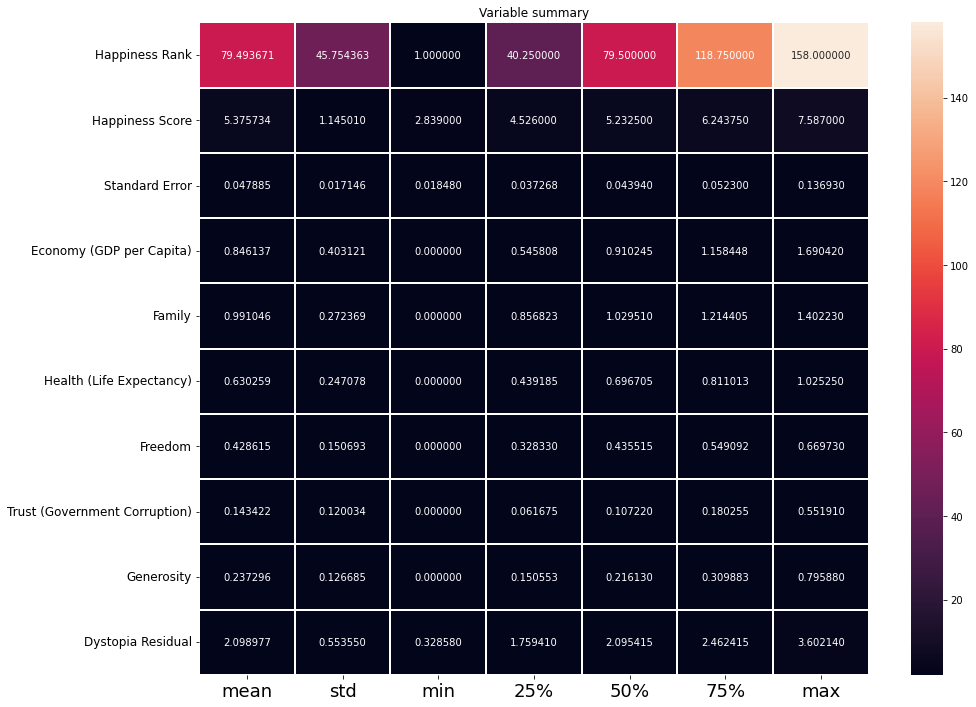

In [23]:
plt.figure(figsize=(15,12))
sns.heatmap(df.describe()[1:].transpose(),2, linewidth = 2, annot = True, fmt = "f")
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 12)
plt.title('Variable summary')
plt.savefig('variablesummary.png')
plt.show()

Observations: 

1. We have 158 values for each respective variable.
2. As from obersving the maximum value and the median value(50%), it actaully shows that data is balanced and bell-shaped. 
3. The standard deviation of the happiness rank is quite high, rest of the variables have the normal data. It implies that among the happiness rank data is widely distributed. 
4. Mean is equal to median value, showing data is normal and bell-shaped curve. 

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [29]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

Note: Since the datatypes of certain varaible is object, it needed to be changed for training process here. 

In [30]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in df.columns: 
    if df[i].dtypes == "object": 
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    float64
 1   Region                         158 non-null    float64
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 14.9 KB


In [25]:
#Outliers checking.

In [26]:
colllist = df.columns.values

In [27]:
colllist

array(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype=object)

In [31]:
from scipy.stats import zscore 
z = zscore(df)

In [33]:
np.where(z>3)

(array([ 27,  40,  64, 115, 128, 153], dtype=int64),
 array([ 9,  4,  4,  4, 10,  9], dtype=int64))

In [34]:
df_new = df[(z<3).all(axis=1)]

In [35]:
df.shape

(158, 12)

In [36]:
df_new.shape

(152, 12)

In [37]:
df = df_new

Now the dataset is filtered, no outliers are available in the dataset anymore. 

<AxesSubplot:>

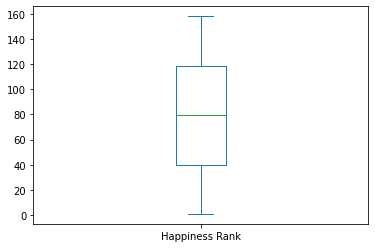

In [39]:
#Checking outliers with boxplot. 
df['Happiness Rank'].plot.box()

<AxesSubplot:>

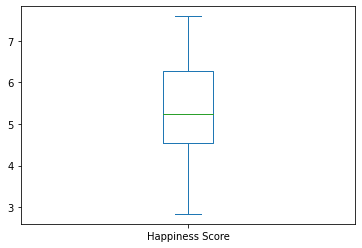

In [40]:
df['Happiness Score'].plot.box()

<AxesSubplot:>

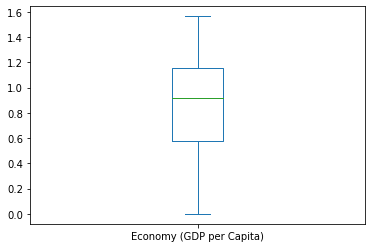

In [41]:
df['Economy (GDP per Capita)'].plot.box()

<AxesSubplot:>

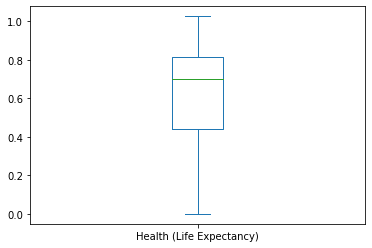

In [43]:
df['Health (Life Expectancy)'].plot.box()

Observation from the boxplot figured above: 
    
    No outliers are present in the data and independent varaibles as well anymore. The data is filtered completely.

In [46]:
#Skewness: 
df.skew()

Country                          0.038368
Region                          -0.115717
Happiness Rank                  -0.002281
Happiness Score                  0.104863
Standard Error                   1.187230
Economy (GDP per Capita)        -0.369427
Family                          -1.028660
Health (Life Expectancy)        -0.733022
Freedom                         -0.393256
Trust (Government Corruption)    1.285137
Generosity                       0.655348
Dystopia Residual               -0.192006
dtype: float64

In [47]:
df.skew().sort_values(ascending = True)

Family                          -1.028660
Health (Life Expectancy)        -0.733022
Freedom                         -0.393256
Economy (GDP per Capita)        -0.369427
Dystopia Residual               -0.192006
Region                          -0.115717
Happiness Rank                  -0.002281
Country                          0.038368
Happiness Score                  0.104863
Generosity                       0.655348
Standard Error                   1.187230
Trust (Government Corruption)    1.285137
dtype: float64

Observation: Outcome of the skewness -- Threshold is taken at +/- 0.65. Following columns is having the skewness - 
    
    Family, Health, Happiness score, Generosity, Trust, and Standard error

<AxesSubplot:ylabel='Density'>

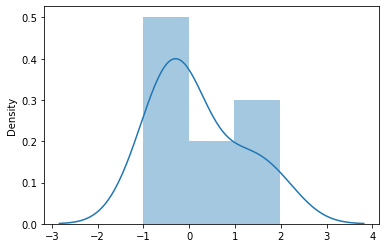

In [27]:
sns.distplot(df.skew())

The skewness is defined within the range of -3 to 4 that actaully shows that dataset do posses some level of skeweness. With certain techniques, this can be converted into the normal distribution curve. 

In [48]:
#Normal Distribution Curve: 

<AxesSubplot:xlabel='Family', ylabel='Density'>

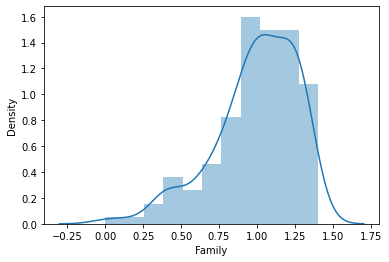

In [49]:
sns.distplot(df['Family'])

The distrubution of pregnancies varaibles is left skewed. The data is not normalised for pregnanies. 

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

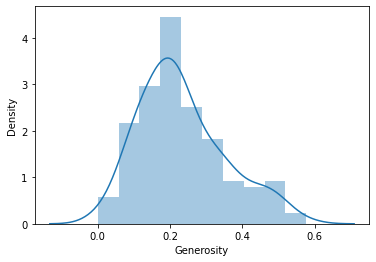

In [64]:
sns.distplot(df['Generosity'])

The data for happiness score is quite normally distributed but it is still little rightly skewed. 

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

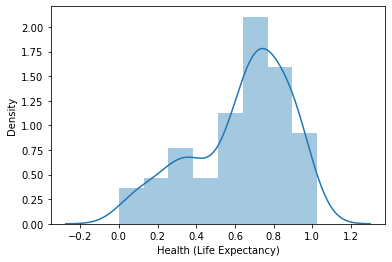

In [51]:
sns.distplot(df['Health (Life Expectancy)'])

The distribution of health - life expetancy is left skeweed and normaly distrubuted. 

<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

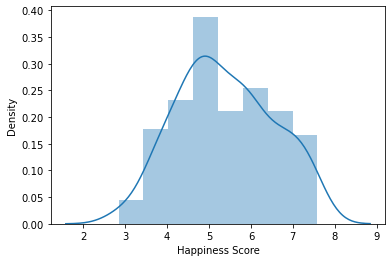

In [52]:
sns.distplot(df['Happiness Score'])

The data for happiness score is quite normally distributed but it is still little rightly skewed. 

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

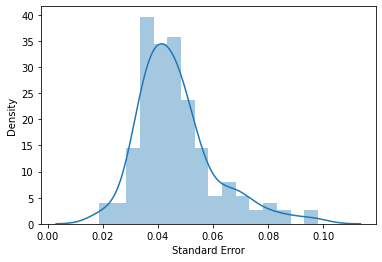

In [53]:
sns.distplot(df['Standard Error'])

The standard error is rightly skewed and distributed. 

In [54]:
#Now all of these variables can be converetd into the normal distribution with the following techniques: 

In [55]:
### Data Cleaning now:

In [56]:
df.corr()['Dystopia Residual'].sort_values(ascending = True)

Happiness Rank                  -0.526797
Generosity                      -0.071526
Region                          -0.047919
Country                          0.000824
Health (Life Expectancy)         0.014158
Economy (GDP per Capita)         0.032218
Standard Error                   0.035218
Trust (Government Corruption)    0.063259
Freedom                          0.099914
Family                           0.137932
Happiness Score                  0.534421
Dystopia Residual                1.000000
Name: Dystopia Residual, dtype: float64

Note: Since happiness score is highly correlated with Dystopia Residual, this needs to ebe corrected with BOCOX technique. 

Rest of the variable like standard error and health is very less correlated. We can drop the varaibles which are less related since it is not going to make much influence of the training of the model. 

In [59]:
df.drop(['Standard Error','Health (Life Expectancy)'], axis = 1, inplace = True)

In [60]:
df

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1,7.587,1.39651,1.34951,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2,7.561,1.30232,1.40223,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3,7.527,1.32548,1.36058,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4,7.522,1.45900,1.33095,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5,7.427,1.32629,1.32261,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
152,0.0,7.0,153,3.575,0.31982,0.30285,0.23414,0.09719,0.36510,1.95210
154,13.0,8.0,155,3.340,0.28665,0.35386,0.48450,0.08010,0.18260,1.63328
155,136.0,4.0,156,3.006,0.66320,0.47489,0.15684,0.18906,0.47179,0.32858
156,21.0,8.0,157,2.905,0.01530,0.41587,0.11850,0.10062,0.19727,1.83302


In [61]:
from scipy.stats import boxcox 
df['Happiness Score'] = boxcox(df['Happiness Score'],0)

<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

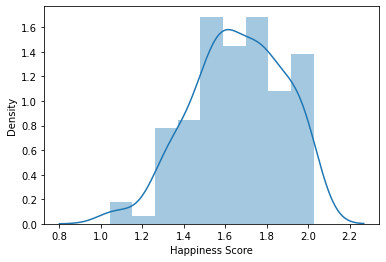

In [62]:
sns.distplot(df['Happiness Score'])

In [63]:
df['Happiness Score'].skew()

-0.34592649998385944

<AxesSubplot:ylabel='Density'>

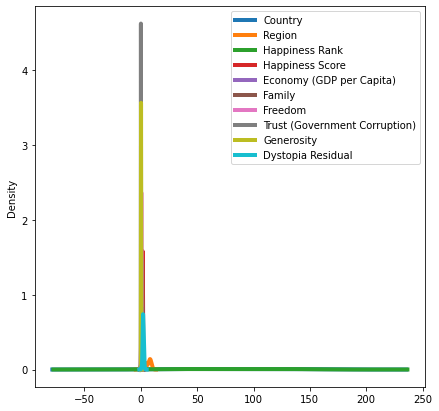

In [68]:
df.plot.density(figsize = (7, 7), linewidth = 4)

Note: The data is quite normally distributed and bell shaped. 

# Dividing the data now - 

In [69]:
#Dividing the data into dependent and independent variables. 
x = df.iloc[:, 0:-1]
y = df.iloc[:,-1]

In [70]:
#Transforming the data from skewness. 
from sklearn.preprocessing import power_transform 
x = power_transform(x)

<AxesSubplot:ylabel='Density'>

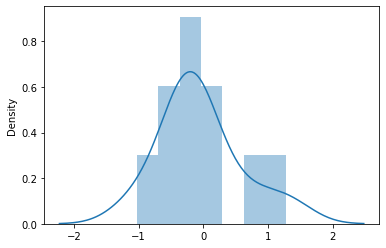

In [73]:
sns.distplot(df.skew())

Now the data is normally distributed within the range of -2 and 2. All skewness is removed from the model.

In [71]:
type(x)

numpy.ndarray

In [72]:
x.mean()

-4.674623261579606e-17

# Model Selection 

In [74]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = .30, random_state = 45)

In [75]:
xtrain.shape

(106, 9)

In [76]:
xtest.shape

(46, 9)

In [77]:
ytrain.shape

(106,)

In [78]:
ytest.shape

(46,)

# Making an Linear Regression Instance 

In [79]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [81]:
lr.score(xtrain, ytrain)

0.9212261447426614

In [82]:
lr.predict(xtest)

array([2.52396306, 1.83503847, 1.84704926, 2.30377376, 2.27718745,
       2.28134081, 2.62079284, 1.55967294, 2.49590272, 2.01631969,
       2.86418241, 1.84709771, 2.67367196, 2.11443728, 2.10683249,
       1.75556415, 1.59003416, 1.84043992, 2.77100893, 1.75511996,
       1.52451548, 1.43641242, 2.48522507, 2.07893363, 2.38795009,
       2.16844815, 2.60490957, 2.53183261, 2.95716307, 2.16837901,
       2.1747862 , 2.12092027, 1.54397616, 2.12808477, 2.08549235,
       1.92032602, 3.57591605, 2.67755624, 2.19998923, 2.31524679,
       2.2905623 , 2.03988637, 2.61151773, 1.49761792, 2.46946532,
       2.26798488])

In [83]:
mean_squared_error(ytest, lr.predict(xtest))

0.01777829072858691

In [84]:
mean_absolute_error(ytest, lr.predict(xtest))

0.1049056875742033

In [85]:
r2_score(ytest, lr.predict(xtest))

0.9162200445254393

# Regualriation 

In [101]:
#Lasso Rgularisation

ls = Lasso(alpha = 0.00001)
ls.fit(xtrain,ytrain)

Lasso(alpha=1e-05)

In [102]:
xp = ls.predict(xtest)

In [103]:
print(mean_squared_error(ytest,xp))
print(mean_absolute_error(ytest,xp))
print(r2_score(ytest,xp))

0.017778423764286136
0.10489757815511487
0.9162194175964995


In [104]:
#Elastic Regression 

es = ElasticNet(alpha = 0.00001)
es.fit(xtrain, ytrain)

ElasticNet(alpha=1e-05)

In [105]:
esp = es.predict(xtest)

In [106]:
print(mean_squared_error(ytest,esp))
print(mean_absolute_error(ytest,esp))
print(r2_score(ytest,esp))

0.017778595899608386
0.10490103147339369
0.9162186064111131


# Making an instane for SVR, DTR now.

In [117]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [118]:
svr = SVR()
svr.fit(xtrain,ytrain)

SVR()

In [119]:
svr.score(xtrain,ytrain)

0.9423566975344079

In [120]:
sp = svr.predict(xtest)

In [121]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [123]:
r2_score(ytest,sp)

0.778622376974379

In [127]:
print(mean_squared_error(ytest,sp))
print(mean_absolute_error(ytest,sp))

0.04697681826947333
0.16582797957082432


Note: Here the training score is better but the testgn score is less with high mean squared error. 

In [128]:
dtr = DecisionTreeRegressor()
dtr.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [129]:
dtr.score(xtrain,ytrain)

1.0

In [130]:
dtr.predict(xtest)

array([2.37119, 2.21126, 1.59927, 2.37119, 2.21126, 2.24639, 3.035  ,
       1.34759, 1.59927, 1.44395, 2.85737, 2.7223 , 2.51009, 1.78555,
       1.83302, 2.32323, 1.86984, 1.44395, 2.82334, 2.75414, 2.75414,
       1.44395, 2.11773, 2.02518, 2.4657 , 0.67108, 2.51009, 2.08528,
       2.61955, 1.89894, 2.04384, 1.42766, 1.68135, 2.11773, 2.41484,
       1.41723, 2.53942, 2.41484, 1.57059, 2.53942, 1.88501, 2.75414,
       2.61955, 2.02518, 1.76145, 2.24743])

In [131]:
mean_absolute_error(ytest,dtr.predict(xtest))

0.40737456521739135

In [132]:
mean_squared_error(ytest,dtr.predict(xtest))

0.2929933882195652

In [133]:
r2_score(ytest,dtr.predict(xtest))

-0.380727393545496

Note: Here the training score is best (1) but the testing score is low with high error.

# Cross Validation 

In [86]:
score = cross_val_score(lr, x,y,cv=5)

In [87]:
print(score)

[0.8665281  0.87072088 0.87769127 0.82490991 0.3058811 ]


In [88]:
print("Mean:", score.mean())
print("Standard Deviation:", score.std())

Mean: 0.7491462527433881
Standard Deviation: 0.22239911880197627


In [107]:
score = cross_val_score(ls, x,y,cv=5)

In [108]:
print(score)

[0.86671859 0.87074141 0.87771785 0.8248208  0.41640376]


In [109]:
print("Mean:", score.mean())
print("Standard Deviation:", score.std())

Mean: 0.7712804851947446
Standard Deviation: 0.17840060284170337


In [110]:
score = cross_val_score(es, x,y,cv=5)

In [111]:
print(score)

[0.86662614 0.87073885 0.87770517 0.82485842 0.41594722]


In [112]:
print("Mean:", score.mean())
print("Standard Deviation:", score.std())

Mean: 0.7711751595580505
Standard Deviation: 0.17857281094584398


In [134]:
score = cross_val_score(svr,x,y,cv=5)

In [135]:
print(score)

[-0.44317481  0.7175502   0.79611629  0.82511939 -0.05279675]


In [136]:
print("Mean:", score.mean())
print("Standard Deviation:", score.std())

Mean: 0.36856286392479276
Standard Deviation: 0.5195189942533824


In [137]:
score = cross_val_score(dtr,x,y,cv=5)

In [138]:
print(score)

[-1.84546109 -0.9141441  -0.98091744 -1.64087157 -1.8272412 ]


In [139]:
print("Mean:", score.mean())
print("Standard Deviation:", score.std())

Mean: -1.4417270779261018
Standard Deviation: 0.4103584150608914


# Saving the best model 

Here is the Linear Regression model is giving the least error and best training and testing score. So saving it for further future predictions with refrence to the model.

In [140]:
import joblib

In [141]:
joblib.dump(lr,"lrmodel.obj")

['lrmodel.obj']

In [143]:
lrjoblib = joblib.load("lrmodel.obj")

In [144]:
#Use the loaded model to make predictions. 

In [145]:
lrjoblib .predict(xtest)

array([2.52396306, 1.83503847, 1.84704926, 2.30377376, 2.27718745,
       2.28134081, 2.62079284, 1.55967294, 2.49590272, 2.01631969,
       2.86418241, 1.84709771, 2.67367196, 2.11443728, 2.10683249,
       1.75556415, 1.59003416, 1.84043992, 2.77100893, 1.75511996,
       1.52451548, 1.43641242, 2.48522507, 2.07893363, 2.38795009,
       2.16844815, 2.60490957, 2.53183261, 2.95716307, 2.16837901,
       2.1747862 , 2.12092027, 1.54397616, 2.12808477, 2.08549235,
       1.92032602, 3.57591605, 2.67755624, 2.19998923, 2.31524679,
       2.2905623 , 2.03988637, 2.61151773, 1.49761792, 2.46946532,
       2.26798488])

In [147]:
"THE END!"

'THE END!'